In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sqlite3
%matplotlib inline

In [168]:
#conn = sqlite3.connect('D:/datasets/board-games-dataset/database.sqlite')

In [169]:
#query = "SELECT * FROM BoardGames"

In [170]:
#df = pd.read_sql_query(query,conn)

In [171]:
df = pd.read_csv('C:/Users/Nishant/Downloads/Compressed/BoardGamesDataAnalysis-master/BoardGamesDataAnalysis-master/board_games.csv')

In [172]:
df.head(3)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761


In [173]:
df.shape

(81312, 20)

In [174]:
df.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [175]:
df.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

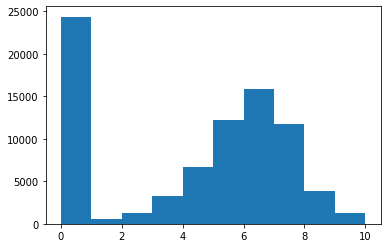

In [176]:
plt.hist(df["average_rating"])

In [177]:
df[df['average_rating']==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [178]:
#removing all values where user rating/average rating is less than 0
data = df[df['users_rated']>0]

In [179]:
data.isnull().sum()

id                       0
type                     0
name                    36
yearpublished            2
minplayers               2
maxplayers               2
playingtime              2
minplaytime              2
maxplaytime              2
minage                   2
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [180]:
data['type'].value_counts()

boardgame             48076
boardgameexpansion     8856
Name: type, dtype: int64

In [181]:
data.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

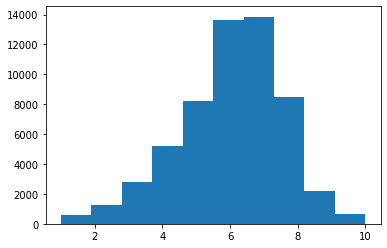

In [182]:
plt.hist(data["average_rating"])

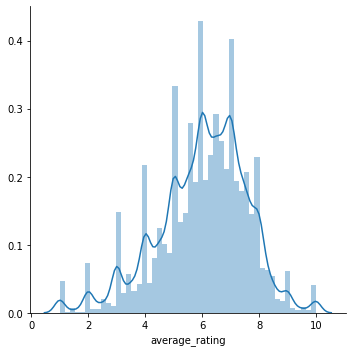

In [183]:
g= sns.FacetGrid(data , height =5)
g.map(sns.distplot, 'average_rating')

In [184]:
#removing id and name columns
data1 = data.iloc[:,3:]
data1.head(3)

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761


In [185]:
data1.isnull().sum()

yearpublished           2
minplayers              2
maxplayers              2
playingtime             2
minplaytime             2
maxplaytime             2
minage                  2
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [186]:
#removing rows with missing values
data1 = data1.dropna(axis=0)

In [187]:
data1.count()

yearpublished           56930
minplayers              56930
maxplayers              56930
playingtime             56930
minplaytime             56930
maxplaytime             56930
minage                  56930
users_rated             56930
average_rating          56930
bayes_average_rating    56930
total_owners            56930
total_traders           56930
total_wanters           56930
total_wishers           56930
total_comments          56930
total_weights           56930
average_weight          56930
dtype: int64

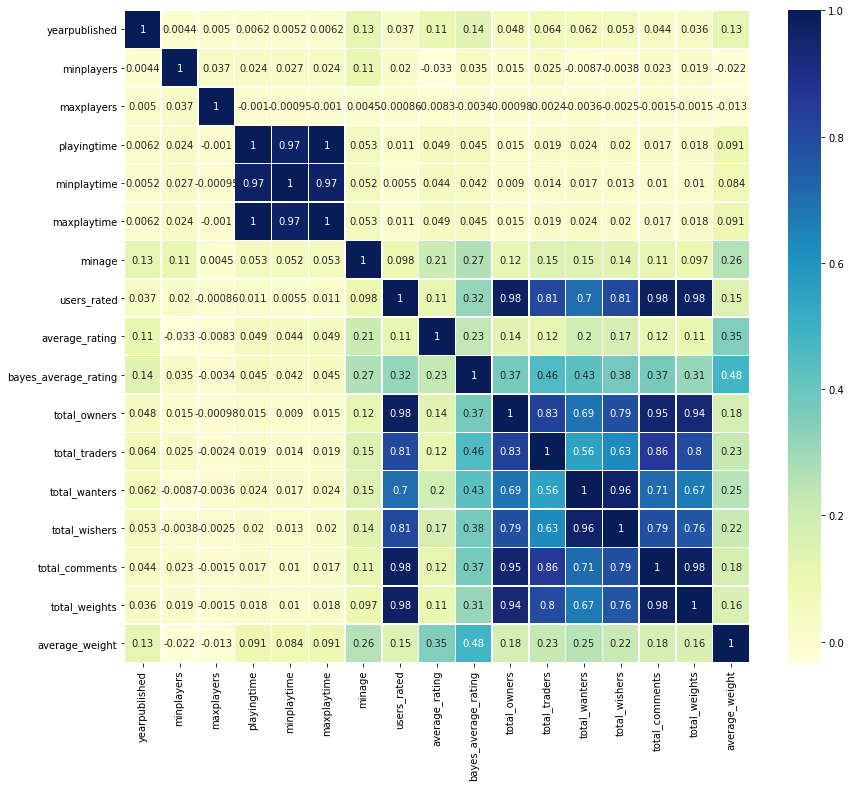

In [188]:
#correlation matrix to check the correlation between columns in the dataset
corrmat = data1.corr()
fig = plt.figure(figsize = (14, 12))
sns.heatmap(corrmat,cmap='YlGnBu', annot=True, linewidths=.5);
plt.show()

In [189]:
corrmat.shape[0]

17

In [190]:
corrmat

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004378,0.004970,0.006235,0.005244,0.006235,0.125212,0.037446,0.108396,0.140959,0.047729,0.064385,0.062272,0.052520,0.043809,0.036218,0.125285
minplayers,0.004378,1.000000,0.037188,0.024290,0.026539,0.024290,0.111199,0.020310,-0.032841,0.034727,0.014533,0.024621,-0.008713,-0.003839,0.022967,0.019008,-0.022046
maxplayers,0.004970,0.037188,1.000000,-0.001021,-0.000950,-0.001021,0.004523,-0.000861,-0.008338,-0.003447,-0.000981,-0.002386,-0.003590,-0.002503,-0.001505,-0.001460,-0.013453
playingtime,0.006235,0.024290,-0.001021,1.000000,0.967909,1.000000,0.053447,0.010913,0.048987,0.045351,0.014538,0.019272,0.024296,0.020303,0.016896,0.017794,0.090895
minplaytime,0.005244,0.026539,-0.000950,0.967909,1.000000,0.967909,0.052431,0.005507,0.043978,0.041854,0.008980,0.014491,0.017498,0.012743,0.010051,0.010177,0.084405
maxplaytime,0.006235,0.024290,-0.001021,1.000000,0.967909,1.000000,0.053447,0.010913,0.048987,0.045351,0.014538,0.019272,0.024296,0.020303,0.016896,0.017794,0.090895
minage,0.125212,0.111199,0.004523,0.053447,0.052431,0.053447,1.000000,0.097822,0.209900,0.266671,0.118484,0.152205,0.153999,0.137392,0.113317,0.097019,0.259442
users_rated,0.037446,0.020310,-0.000861,0.010913,0.005507,0.010913,0.097822,1.000000,0.112570,0.318006,0.977664,0.807875,0.702439,0.805120,0.978708,0.975724,0.150616
average_rating,0.108396,-0.032841,-0.008338,0.048987,0.043978,0.048987,0.209900,0.112570,1.000000,0.231579,0.137485,0.119472,0.196567,0.171377,0.123723,0.109697,0.351053
bayes_average_rating,0.140959,0.034727,-0.003447,0.045351,0.041854,0.045351,0.266671,0.318006,0.231579,1.000000,0.371035,0.455046,0.426728,0.377231,0.371049,0.313316,0.482381


In [191]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [192]:
#selecting columns where correlation less than 0.9
for i in range(corrmat.shape[0]-1):
    for j in range(i+1, corrmat.shape[0]-1):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [193]:
selected_columns = data1.columns[columns]
data_selected = data1[selected_columns]

In [194]:
#removing the target column from the list of selected columns
#selected_columns = selected_columns.drop('average_rating')

In [195]:
selected_columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minage',
       'users_rated', 'average_rating', 'bayes_average_rating',
       'total_traders', 'total_wanters', 'average_weight'],
      dtype='object')

In [196]:
# #selecting columns based on p values

# import statsmodels.formula.api as sm
# def backwardElimination(x, Y, sl, columns):
#     numVars = len(x[0])
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(Y, x).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         if maxVar > sl:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     x = np.delete(x, j, 1)
#                     columns = np.delete(columns, j)
                    
#     regressor_OLS.summary()
#     return x, columns
# SL = 0.05
# data_modeled, selected_columns = backwardElimination(data_selected.values, data1.iloc[:,8].values, SL, selected_columns)

In [197]:
#moving the result to a new dataframe

result = pd.DataFrame()
result['average_rating'] = data1.iloc[:,8]

In [198]:
result.describe()

,average_rating
count,56930.000000
mean,6.015886
std,1.578574
min,1.000000
25%,5.000000
50%,6.150000
75%,7.039417
max,10.000000


In [199]:
#creating a dataframe using columns selected using p-value and correlation

data_final = pd.DataFrame(data = data_selected, columns = selected_columns)
data_final.head(3)

,yearpublished,minplayers,maxplayers,playingtime,minage,users_rated,average_rating,bayes_average_rating,total_traders,total_wanters,average_weight
0,2005.0,2.0,2.0,180.0,13.0,20113,8.33774,8.22186,372,1219,3.4785
1,2012.0,2.0,5.0,150.0,12.0,14383,8.28798,8.14232,132,1586,3.8939
2,2013.0,1.0,7.0,210.0,12.0,9262,8.28994,8.06886,99,1476,3.7761


In [200]:
data_final = data_final.drop('average_rating',axis=1)

In [227]:
x_train, x_test, y_train, y_test = train_test_split(data_final, result, test_size = 0.1,random_state = 101)

In [241]:
y_train = y_train.astype(int)

In [228]:
# Initialize the model class.
model = LinearRegression()

model.fit(x_train, y_train)

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
Y_pred = model.predict(x_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(Y_pred, y_test)

2.038307996771017

In [229]:
#find R Square for the model

model.score(x_train,y_train)

0.1552820187951558

In [230]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, Y_pred))
print(metrics.mean_squared_error(y_test, Y_pred))
print(metrics.explained_variance_score(y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))


1.0774599486169845
2.038307996771017
0.14094724924272817
1.4276932432322487


In [231]:
#RMSE
print(np.sqrt(metrics.r2_score(y_test, Y_pred)))

0.375350735620215


In [232]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [233]:
print(mean_absolute_percentage_error(y_test, Y_pred))

23.87339573981627


In [235]:
# import scipy
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_train, y_train)

In [246]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest 

96.91